# Simulating Rutherford Scattering
## Freddie Nunn
### Eton College Computational Physics Prize 2022
***

## 1. Introduction
***
### 1.1 History of Rutherford Scattering
Rutherford Scattering is a phenomenon first explained by Ernest Rutherford in 1911; it describes the scattering of charged particles due to the Coulomb Interaction (force between charged particles). The phenomenon was first tested by Hans Geiger and Ernest Marsden in 1909 using the gold foil experiment, shown below:

<img src="images/Hnet.com-image.png" alt="Gold Foil Diagram" style="width:400px;">

The experiment consisted of bombarding a thin gold foil with alpha particles from a radium source, and measuring the angle it comes out with a fleorescent screen. At the time, the most widely accepted model of an atom was Thomson's 'plum pudding' model, which describes an atom as a sperical region of positive charge with negative particles scattered inside. According to this model, the particles should pass through the atoms with very little deflections in their path, as there is no large concentration of charge to deflect the particles. They found most particles went through without much deflection, as expected, but a few particles were deflected very large angles. This was not explained until Rutherford published his paper in 1911 detailing the Rutherford model of the atom, which consists of a small positive densly charged area in the center of the atom called the nucleus, orbited by negative particles. This explained the experiment's behaviour, as a small amount of the alpha particles would get very close to the nucleus, exerting a large force on the alpha particle, in turn causing a large deflection. This model is very similar to the one used today, and was a big leap for particle physics.


### 1.2 The Physics of Rutherford Scattering

Rutherford scattering is a direct consequence of Coulombs Law, which describes the force between charged objects.
$$ {F = -\frac {1}{4\pi \epsilon_{0}}\frac {q_{1}q_{2}}{r^{2}}} $$
Where $F$ is the force on the object in the direction of the other object, $\epsilon_{0}$ is the permutivity of a vacuum, $q_{1}$ and $q_{2}$ are the charges of the objects, and $r$ is the distance between them. The main consequences of this in this context are:
1. The force between the particles increases as they get closer
2. the direction of the force on the alpha particle is directly away from the nucleus.

These 2 factors result in a behaviour where most of the particles' trajectories are fairly unchanged, since they don't get close enough to a nucleus for the force to be significant, but a few particles that get close enough to the nucleus are pushed away, changing their trajectory drastically. This change in trajectory is what Rutherford measured to create his atom model, and is what I will be attempting to recreate.

## 2. Model Overview
***
The aim of this model is to model Rutherford Scattering by simulating the Gold Foil experiment that Geiger and Marsden performed. I will then measure the distribution of scattering angles, and compare it to real data to check its accuracy.

### 2.1 Factors to Consider

In order to create as accurate a model as possible, I will need to consider all factors that could affect the scattering angle, and decide whether to include them in my model or not.

#### 2.1.1 Included Factors


##### Material and Lattice Structure

In the original experiment, they fired the alpha particles at a thin leaf of gold lattice a few atoms thick. However, in Rutherford's paper he repeated the experiment with multiple different materials, to verify the scattering effect with different materials and investigate the effect of different atom weights and sizes. In my model, varying the material is much easier than Rutherford's experiment, and is just a question of different numbers. My final model will also use a 3 Dimensional lattice  to be as accurate as possible, but I will also model a single atom and a 2 Dimensional lattice on the way, as they are easier and allow me to more closely invesigate specific parts of the model.

##### Alpha Particle Velocity

The velocity of the alpha particles directly affects the angle of deflection, as the faster the particle is, the less time it spends close to the nucleus and so it will be pushed less. In Rutherford's experiments, he used a radium source to emit alpha particles with a random distribution of velocities. However, I will use a constant velocity for all of the alpha particles. While this means the results may slightly differ from Rutherford's, it also means the results will be more accurate, as each particle from the same position will be deflected the same amount; A luxury unavailable to Rutherford at the time.

##### Effect of Force on Nucleus

The Coulomb Force acts on both particles involved, and so the nucleus will also feel a repulsive force from the alpha particle. This creates a small 'recoil' in the nucleus, which can affect the deflection angle. I will take the same approach as with the lattice structure, by implementing it once I have a basic model completed.

#### 2.1.2 Exluded Factors


##### Relativistic Effects

According to Einstein's Special Relativity, an object's mass is affected by its velocity by a factor of $\frac {1}{\sqrt {1 - \frac {v^{2}}{c^{2}}}} $, where $v$ is the object's velocity and $c$ is the speed of light in a vacuum. To decide whether to include this in my model, I calculated the speed of an alpha particle being emitted from a radium source. The alpha particles emitted have 5.6 MeV of energy, and using $KE = \frac {1}{2}mv{2}$ and a mass of 4u, I found the speed to be $1.6\times10^{7} m s^{-1}$. I then calculated the relativistic mass using the factor stated earlier, and I got $6.7\times10^{-27}kg$. Finally, I calculated the % change of mass using the following formula:
$$ \frac {m_{rel} - m}{m} \times 100\% $$
Where $m$ is the standing mass and $m_{rel}$ is the relativistic mass, and got 0.15% change. This shows that at these speeds, the change in mass is neglegable, and I can safely assume the particles do not feel these relativistic effects in my model, without significantly affecting the results.

##### Charge Distribution in Particles

In my model, I will assume charge is distributed uniformly within the particles. In reality, this is not true, as charge is contained in discreet protons within the nucleus. However, Coulomb's Law only works with point charges or uniformly distributed charge in a sphere, and so this assumption must be made for the model to hold up. Once I have completed the model, I may be able to depict this accurately by considering the Coulomb force from each proton in a nucleus, increasing the accuracy of the results.

### 2.2 Model Breakdown

#### 2.2.1 Parameters

The parameters for this model can be split into 3 main categories: alpha particle, Nucleus, and simulation parameters.

##### Alpha Particle

- $Q_{1}$: Charge of the particle
- $m_{\alpha}$: Mass of the particle
- $r_{\alpha}$: Radius of the particle
- $u$: Initial speed

The mass, charge and radius of the particle will be based off the actual alpha particle values. Initial speed will be chosen to follow Geiger and Marsdon's original experiment as similarly as possible.

##### Nucleus

- $Q_{2}$: Charge of the nucleus
- $m_{n}$: Mass of the nucleus
- $r_{n}$: radius of the nucleus

The mass, charge and radius will be decided by the material being used. This will be gold for most of the simulation to correlate with the original experiments.

##### Simulation

- $a$: Activity of the source
- $n$: number of alpha particles
- $A$: Area of lattice
- $t$: thickness
- $d$: Distance from source to lattice

the activity decides the chance an alpha particle is created and will be based off the radium source used in the original experiment. The number of alpha particles is the total number emitted, and so determines how long the simulation will take and how accurate the results will be. The area and thickness of the lattice decide the size of the lattice that the alpha particles will be fired into. The distance between source and lattice decides both how far away alpha particles are when they are created, and the distance from the lattice at which their scattering angle should be measured. 

#### 2.2.2 The Simulation

This describes the oultine of the simulation process.

1. Initialize the atoms with positions according to the lattice shape and size, and values according the the material being used.
2. Choose whether to create an alpha particle or not randomly, according to the activity.
   - If an alpha particle is created, initialize it with a position randomly on a 2D plane representing the source.
3. Calculate the net force on each alpha particle by combining the force from each nucleus.
4. Move forward a fixed timestep and change the alpha particles accordingly.
5. If an alpha particle is over $d$ distance from the centre of the lattice, measure its scattering angle, and delete the particle.
6. repeat steps 2-5 until $n$ alpha particles have been created and deleted.

## 3. Algorithm Details
***
Here I will go over the details and mathematics involved with the algorithms I will create.
### 3.1 Distance and Force

The core algorithms in this model are calculating the distance and force between particles. This forms the basis of how Rutherford Scattering work.

Distance is calculated using the Euclidean Distance formula between 2 vectors A and B:
$$ r = \sqrt{(x_{A}-x_{B})^{2}+(y_{A}-y_{B})^{2}+(z_{A}-z_{B})^{2}} $$
and force can be calculated using Coulomb's Law.
$$ {|F| = \frac {Q_{A}Q_{B}}{4\pi \epsilon_{0}r^{2}}} $$
This gives us the magnitude of the force, but we then need to calculate the force vector. Since both we know both particles will always be positive, the direction of the force must be directly away from the other particle. Therefore for a force on A, the direction is:
$$ \vec{BA} = \begin{pmatrix} x_{A}-x_{B} \\ y_{A}-y_{B}  \\  z_{A}-z_{B} \end{pmatrix} $$
We can now calculate the force vector.
$$ F =  \lambda\times\vec{BA} $$
$$ |F| =  \lambda|\vec{BA}| $$
$$ F = \frac{|F|}{|\vec{BA}|}\times \vec{BA} $$

##### 3.1.1 Net Force
Calculating the net force is as simple as adding up the forces from all particles.
$$ \sum F = \sum_{i}\begin{pmatrix} x_{i} \\ y_{i}  \\  z_{i} \end{pmatrix} $$




### 3.2 Update Position and Velocity

To update 

[5.80897539e-17 1.12181674e-16 0.00000000e+00]
8785.791225401726
8796.343671123353
8806.915139779394
8817.505677120967
8828.115329036811
8838.744141553774
8849.39216083735
8860.059433192138
8870.746005062367
8881.4519230324
8892.177233827237
8902.921984313021
8913.686221497568
8924.46999253086
8935.273344705576
8946.0963254576
8956.938982366546
8967.801363156292
8978.683515695477
8989.585487998058
9000.507328223832
9011.449084678952
9022.410805816473
9033.392540236902
9044.394336688702
9055.416244068872
9066.458311423468
9077.520587948144
9088.603122988712
9099.705966041694
9110.829166754871
9121.972774927826
9133.136840512516
9144.321413613838
9155.526544490163
9166.75228355394
9177.99868137222
9189.26578866726
9200.553656317083
9211.862335356034
9223.191876975403
9234.542332523946
9245.913753508521
9257.306191594631
9268.719698607028
9280.154326530317
9291.610127509512
9303.087153850669
9314.585458021453
9326.105092651756
9337.646110534293
9349.208564625209
9360.792508044673
9372.397

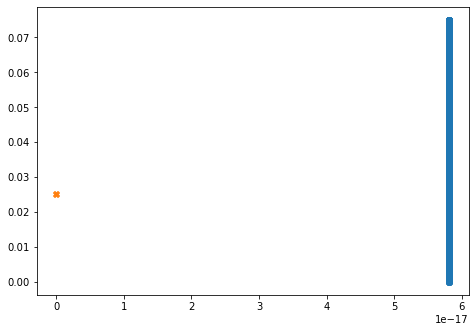

In [14]:
#Temporary file for mockup of Particle class and testing

import numpy as np
import matplotlib.pyplot as plt
from random import random

class Particle:
    E0 = 8.85e-12
    u = 1.66e-27
    e = 1.602e-19

    def __init__(self, mass: float, charge: float, position: np.array, velocity: np.array):
        self.mass = mass*self.u
        self.charge = charge*self.e
        self.position = position
        self.velocity = velocity
        self.initialVel = np.array(velocity)

    def distance(self, particle):
         return np.linalg.norm(self.position-particle.position)

    def attraction(self, particle):
        return (self.charge*particle.charge)/(4*np.pi*self.E0*(self.distance(particle)**2))

    def netForce(self, particles):
        force = np.zeros(3)
        for particle in particles:
            forceMag = self.attraction(particle)
            direction = self.position-particle.position
            force += (forceMag/np.linalg.norm(direction))*direction

        return force
    
    def updatePosVel(self, particles, TIMESTEP):
        a = self.netForce(particles)/self.mass
        self.velocity += a*TIMESTEP
        self.position += self.velocity*TIMESTEP
    
    def calcTimeStep(self, particles):
        magA = np.linalg.norm(self.netForce(particles)/self.mass)
        # minDistance = np.inf
        # for particle in particles:
        #     minDistance = min(minDistance, self.distance(particle))
        # halfStep = np.linalg.norm(minDistance/(4*self.velocity))
        # print(minDistance)
        # print(np.linalg.norm(self.velocity))
        # print(magA**-1)
        # print(halfStep)
        print(magA)
        return min((magA**-1),1e-12)
    
    def calcAngle(self):
        dot = np.dot(self.velocity, self.initialVel)
        angle = np.arccos(dot/(np.linalg.norm(self.velocity)*np.linalg.norm(self.initialVel)))
        return np.degrees(angle)

def randomPoint(maxRad):
    # np.random.seed(2)
    theta = np.random.uniform(0,2*np.pi, 1)
    radius = np.random.uniform(0,maxRad, 1)
    return np.array([radius[0]*np.cos(theta[0]), radius[0]*np.sin(theta[0]), 0.])

alphaCount = 1
# alpha = Particle(4, 2, np.array([0.0, 0, 0]), np.array([0.0, 0, 1.5e7]))
alphas = [Particle(4, 2, randomPoint(1e-15), np.array([0.0, 0, 1.5e7]))]
nuclei = [Particle(197, 79, np.array([0., 0, 0.025]), np.zeros(3))]
# print(randomPoint(0.0000000005))
positions = np.array([alphas[0].position])
# while alpha.distance(nuclei[0]) <= 1e-7:
#     timeStep = alpha.calcTimeStep(nuclei)
#     # print(alpha.calcTimeStep(nuclei))
#     alpha.updatePosVel(nuclei, timeStep)
#     positions = np.concatenate(([alpha.position], positions))
# print(alpha.calcAngle())
timeElapsed = 0
angles = []
activity = 37e9
while alphaCount < 1:
    timeStep = np.inf
    for alpha in alphas:
        timeStep = min(timeStep, alpha.calcTimeStep(nuclei))
    timeElapsed += timeStep
    
    for alpha in alphas:
        alpha.updatePosVel(nuclei, timeStep)
        if alpha.distance(nuclei[0]) <= 1e-7:
            angles.append(alpha.calcAngle())
            alphas.remove(alpha)

    if random() < activity*timeStep:
        alphas.append(Particle(4, 2, randomPoint(1e-14), np.array([0.0, 0, 1.5e7])))
        alphaCount += 1
print(alphas[0].position)
while len(alphas) !=  0:
    timeStep = np.inf
    for alpha in alphas:
        timeStep = min(timeStep, alpha.calcTimeStep(nuclei))
    # print(timeStep)

    for alpha in alphas:
        alpha.updatePosVel(nuclei, timeStep)
        # print(alpha.position)
        positions = np.concatenate(([alpha.position], positions))
        if alpha.distance(nuclei[0]) > 0.05:
            angles.append(alpha.calcAngle())
            alphas.remove(alpha)
    
# hist = plt.hist(angles, 50, facecolor='g', alpha=0.75)
# plt.xlabel('Angles')
# plt.ylabel('Frequency')
# plt.title('Histogram of Angles')
# plt.xlim(0, 180)
# plt.ylim(0, 100)
# plt.grid(True)
# plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(positions[...,0], positions[...,2], marker = "o")
ax.scatter(nuclei[0].position[0], nuclei[0].position[2], marker = "X")
plt.show()